<a href="https://colab.research.google.com/github/rictika/Rictika15/blob/main/Programming_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


<Figure size 1200x600 with 0 Axes>

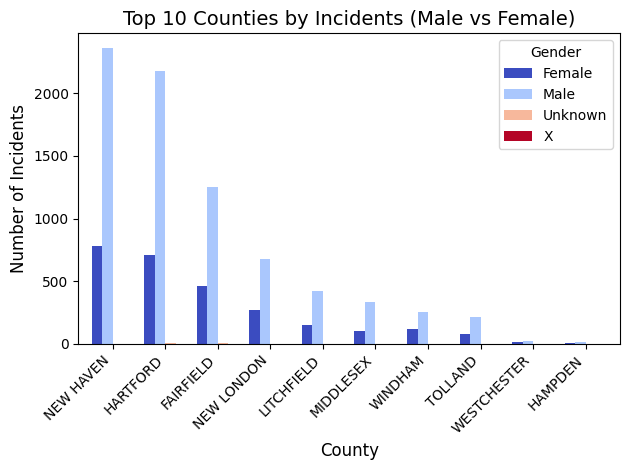

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#The dataset is loaded into a DataFrame from a CSV file. It contains information about accidental drug-related deaths from 2012 to 2023.
data = pd.read_csv("/content/drive/MyDrive/Assighnemnt_1/Accidental_Drug_Related_Deaths_2012-2023.csv")

# Data cleaning
data['Sex'] = data['Sex'].str.strip().str.title() # Removes extra spaces and capitalizes the first letter.
data['Fentanyl'] = data['Fentanyl'].str.strip().str.upper() # Remove spaces and converts all text to uppercase
data['Age'] = data['Age'].fillna(data['Age'].median())  # Missing values in the "Age" column are replaced with the median value of that column. This is a common practice for handling missing numerical data.
data['Sex'] = data['Sex'].fillna('Unknown') # Missing values in the "Sex" column are replaced with "Unknown"


residence_gender = data.groupby(['Sex', 'Residence County']).size().unstack(fill_value=0)  # This groups the data first by Sex and then by Residence County. For each combination of Sex and Residence County, it counts the occurrences
top_counties = residence_gender.sum(axis=0).sort_values(ascending=False).head(10).index # Sums the values across rows to get the total number of incidents per county.
top_residence_gender = residence_gender[top_counties] # Filters the original data to include only the top 10 counties


plt.figure(figsize=(12, 6)) # Adjusts a figure's initial dimensions to 12 inches wide by 6 inches tall.
top_residence_gender.T.plot(kind='bar', colormap="coolwarm", width=0.8) # Plotting a bar chart for the top residence counties, with gender distribution.

plt.title("Top 10 Counties by Incidents (Male vs Female)", fontsize=14) # Adds a title to the plot.
plt.ylabel("Number of Incidents", fontsize=12)  # Labels the y-axis (Number of Incidents) and x-axis (County).
plt.xlabel("County", fontsize=12)
plt.legend(title="Gender", loc="upper right") # Adds a legend to the plot with the title "Gender".
plt.xticks(rotation=45, ha="right") # Rotates the x-axis labels (county names) by 45 degrees for better readability.
plt.tight_layout()
plt.show()

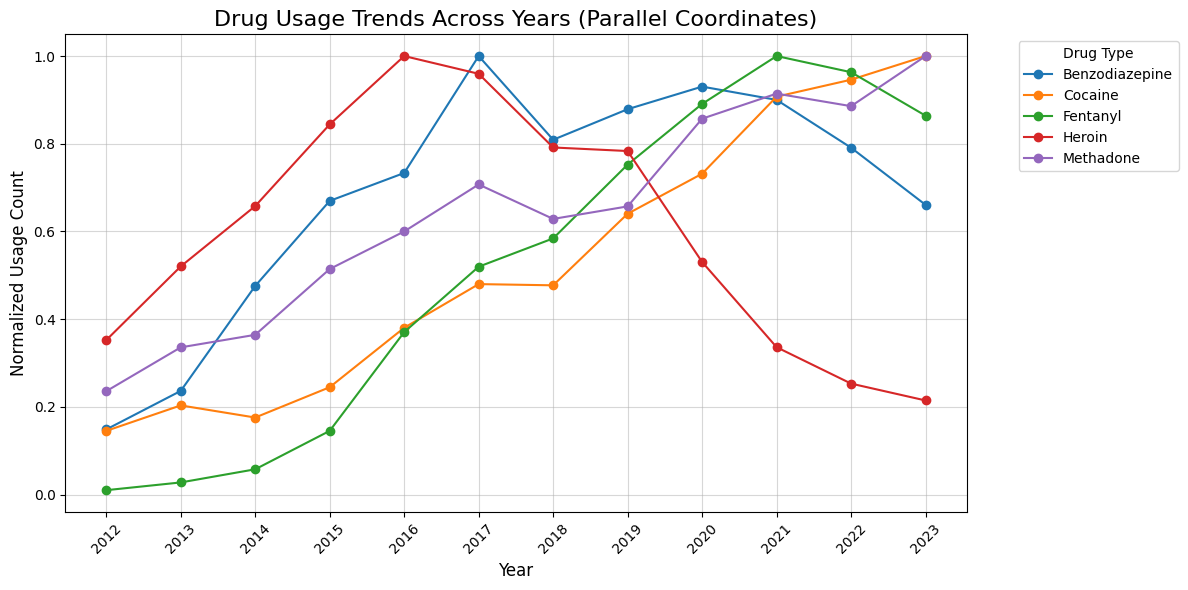

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (update the file path to point to your data)
# The dataset should include columns for dates and drug usage (e.g., Fentanyl, Heroin, etc.).
# Example: data = pd.read_csv("path_to_your_file.csv")

# List of drug-related columns we want to analyze
# These are the specific drugs we’ll focus on in our analysis.
drug_columns = ['Fentanyl', 'Heroin', 'Cocaine', 'Methadone', 'Benzodiazepine']

# Preprocess the dataset to extract useful information
# Convert the 'Date' column into a proper date format, then extract only the year.
# This allows us to analyze trends over time by year.
data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year

# Transform the data for easier analysis
# We’re reshaping the dataset so that each row shows the year, drug type, and whether it was used.
drug_usage_by_year = data.melt(
    id_vars=['Year'],  # Keep the 'Year' column as it is.
    value_vars=drug_columns,  # Focus only on the drug-related columns.
    var_name='Drug Type',  # Create a new column called 'Drug Type' to hold the drug names.
    value_name='Usage'  # Create another column called 'Usage' to indicate if the drug was used (Y/N).
)

# Filter out cases where the drug was not used ('N') and group the data
# We count how many times each drug was used in each year.
drug_usage_by_year = (
    drug_usage_by_year[drug_usage_by_year['Usage'] == 'Y']  # Keep only rows where 'Usage' is 'Y'.
    .groupby(['Year', 'Drug Type'])  # Group the data by year and drug type.
    .size()  # Count the number of times each drug was used in a given year.
    .unstack(fill_value=0)  # Reshape the data into a table where each column is a drug.
)

# Normalize the data
# We scale the numbers for each drug so the highest usage becomes 1 and the lowest becomes 0.
# This makes it easier to compare trends across different drugs.
normalized_year_data = drug_usage_by_year / drug_usage_by_year.max()

# Create a line plot to visualize the trends
plt.figure(figsize=(12, 6))  # Set the size of the plot.

# Draw a line for each drug type
for drug in normalized_year_data.columns:
    plt.plot(
        normalized_year_data.index,  # Use the years as the x-axis.
        normalized_year_data[drug],  # Use the normalized usage numbers as the y-axis.
        marker='o',  # Add markers to highlight data points.
        label=drug  # Label each line with the drug name.
    )

# Add a title and labels to the plot
plt.title('Drug Usage Trends Across Years (Parallel Coordinates)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Usage Count', fontsize=12)

# Rotate the year labels on the x-axis so they’re easier to read
plt.xticks(normalized_year_data.index, rotation=45)

# Add a legend to show which line corresponds to which drug
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a grid to make it easier to follow the trends
plt.grid(alpha=0.5)

# Adjust the layout so nothing overlaps or gets cut off
plt.tight_layout()

# Show the final plot
plt.show()
